In [1]:
%pylab inline
path = "C:/Users/t16091hd/Local Docs/FMR Files"

sys.path.append(path)

import FMR_Analysis_Final as fmrAna
rcParams['figure.figsize'] = 9,6

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
#load in data
filename = 'AJA1544' #Define file name


## Load FMR Data
s12C = np.transpose(np.loadtxt(fname = "C:/Users/t16091hd/Local Docs/FMR data/AJA1544_retest2_changecal/S12-Freq-Field-Sweep.csv",  delimiter="," ))
freq = np.loadtxt(fname = "C:/Users/t16091hd/Local Docs/FMR Files/Frequency_110s.txt" )
current = np.loadtxt(fname = "C:/Users/t16091hd/Local Docs/FMR data/AJA1544_retest2_changecal/Field.csv", delimiter="," )
fieldCurrentFile = np.loadtxt(fname ="C:/Users/t16091hd/Local Docs/FMR Files/FieldCal.csv", delimiter=",")


In [3]:
##Calculate Field - maybe to identify each individual lorentzian profile ##

In [4]:
field = fmrAna._calcField(fieldCurrentFile, current)

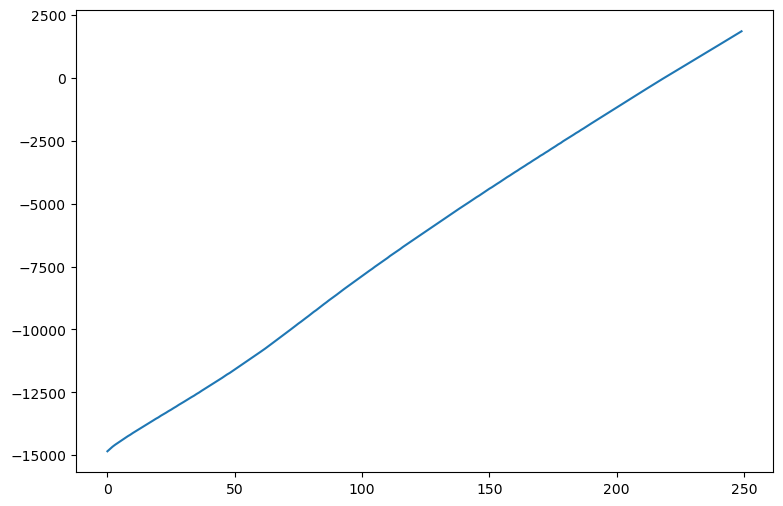

In [5]:
plt.plot(field)

In [6]:
## Remove Background - maybe use if you need to subtract background##

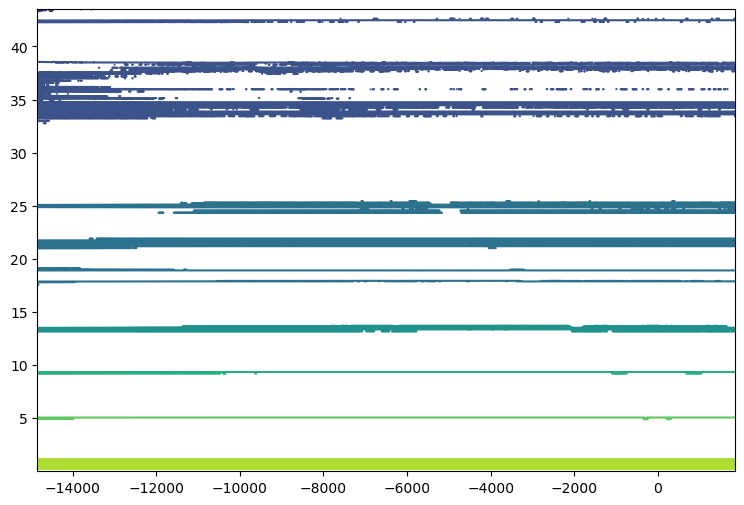

In [7]:
#Before Background Removal
cp = plt.contour(field, freq, s12C)

In [8]:
correctedS12=fmrAna._BaselineRemoval(s12C, 30) 

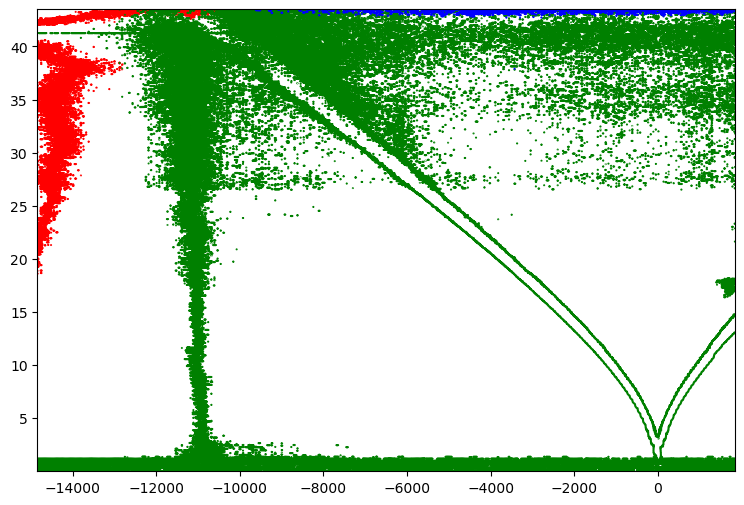

In [9]:
#After Background Removal
cp = plt.contour(field, freq, correctedS12,levels=[-0.5, 0, 0.5],
    colors=['red', 'green', 'blue'], extend='both')

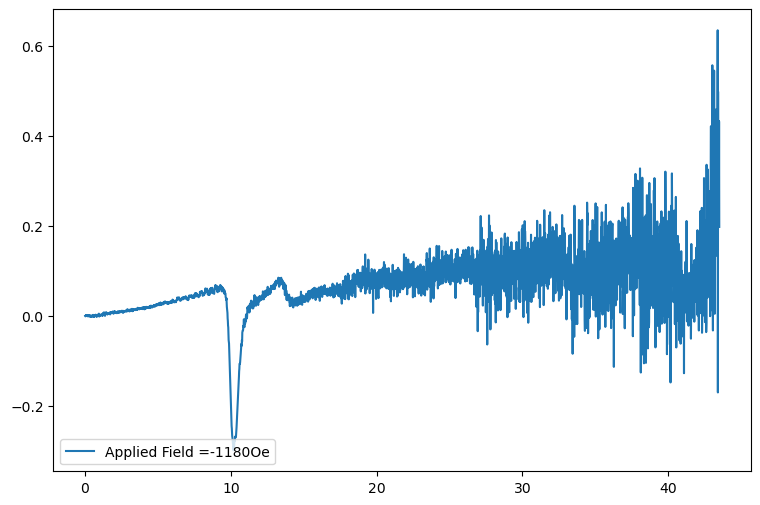

In [10]:
## Plot S12 Profiles- Load prfiles here##
profileIdx = 200
s12Profile = plt.plot(freq, correctedS12[:,profileIdx])
plt.legend(['Applied Field ='+ str(int(field[profileIdx]))+'Oe'], loc='lower left')


C:\Users\t16091hd\OneDrive - The University of Manchester\FMR Files\FMR_Analysis_Final.py:209: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  resultsArray=np.vstack((resultsArray, np.array([field[i], result.params['y0'].value, result.params['y0'].stderr,\


33.147777378168115
32.89617931772069
32.708598157300244
32.46895514768609
32.15929782052023
32.0151993296676
31.785276291513288
31.60493646186303
31.349983079716772
31.16509141883564
30.930839666830302
30.672883165901382
30.535890443627615
30.279040781188932
30.031819478268442
29.84006534217205
29.584280434710198
29.361820534573845
29.16883195581095
28.911435806981537
28.68855243045996
28.505833386314393
28.318996450634067
28.03523960447619
27.868067749218426
27.57852122934054
27.426790424184354
27.237423556897834
26.983579361644793
26.721673360115936
26.542920240340024
26.289978231945426
26.121277156184014
25.92105489707327
25.704604062359888
25.452158064901102
25.19966204697403
25.004348349489735
24.751300532870054
24.54378532053034
24.333019714319697
24.18357175274045
23.918955316450198
23.702929626698207
23.493008363035486
23.26610434078104
23.077787242535333
22.844261710994175
22.69134149964918
22.38541286689342
22.200084252408956
21.982966192262253
21.745374021872323
21.536330556

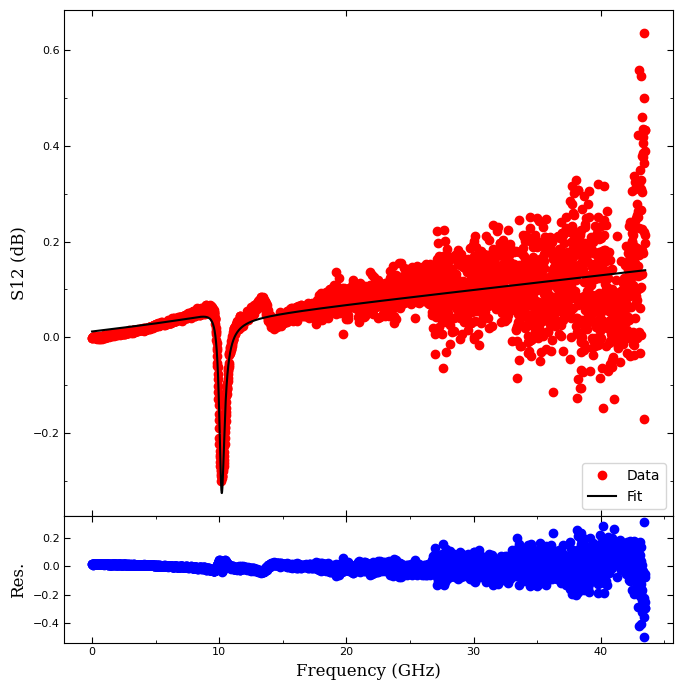

In [11]:
# create a set of Parameters - set parameters you don't use to vary = False
params = fmrAna.Parameters()
params.add('y0', value=0, min= -0.01, max=0.01) #baseline
params.add('m', value=0, min= -0.005, max=0.005 ) #linear background

#Peak 1
params.add('amp1', value=-0.3, min= -10, max=0) 
params.add('wid1', value=1, min= -np.inf, max=np.inf)
params.add('cen1', value=35, min= -np.inf, max = np.inf)
params.add('phi_1', value=0.01, min=0, max=(np.pi/2) ) #mixing
#params.add('freqDiff', value = 0.8, min = 0.05, max=2)

#Peak 2 (Values fixed at 0 for one peak fit)
params.add('amp2', value=0, vary = False) 
params.add('wid2', value=0, vary = False)
params.add('cen2', value=0, vary=False)
params.add('phi_2', value =0, vary=False ) #mixing

#Peak 3 (Values fixed at 0 for one/two peak fit)
params.add('amp3', value=0, vary = False) 
params.add('wid3', value=0, vary = False)
params.add('cen3', value=0, vary=False)
params.add('phi_3', value =0, vary=False ) #mixing

#Peak 4 (Values fixed at 0 for one/two/three peak fit)
params.add('amp4', value=0, vary = False) 
params.add('wid4', value=0, vary = False)
params.add('cen4', value=0, vary=False)
params.add('phi_4', value =0, vary=False ) #mixing


# Use if 2 peak fit needed
'''
#Peak 2
params.add('amp2', value=-0.3, min= -10, max=0) 
params.add('wid2', value=1, min= 0, max=3)
params.add('cen2', expr='cen1 +freqDiff')
params.add('phi_2', value=0.01, min=0, max=(np.pi/2) ) #mixing


#Peak 3 (Values fixed at 0 for one/two peak fit)
params.add('amp3', value=0 ) 
params.add('wid3', value=0)
params.add('cen3', value=0)
params.add('mix3', value =0) #mixing
'''

'''
#Peak 4 (Values fixed at 0 for one/two/three peak fit)
params.add('amp4', value=0) 
params.add('wid4', value=0)
params.add('cen4', value=0)
params.add('mix4', value =0) #mixing
'''


#Frequency Range
a=0                      #usually 10 MHz
b=3201                  #Usually 43.5 Ghz


#Number of Peaks
peakNumber=1


###Constrains - from one fit to next####
#Freq
lowConstraintFreq=-np.inf
highConstraintFreq = np.inf
#Wid
lowConstraintWid=0.5
highConstraintWid = np.inf
#Amp
lowConstraintAmp=0.5
highConstraintAmp = np.inf
constraints = [lowConstraintFreq, highConstraintFreq, lowConstraintWid, highConstraintWid, lowConstraintAmp, highConstraintAmp]



##Profiles to fit##
startProfile=100
endProfile=210

#Profile to view
profileIdx =100

data = correctedS12[:,startProfile:endProfile]


resultsArray, finalS12Profiles, resultsArrayHeadings, risiduals =fmrAna._fit(params, freq[a:b], data, field[startProfile:endProfile], startProfile, endProfile, peakNumber, constraints)
#fmrAna._plot(freq[a:b], data, finalS12Profiles, risiduals, profileIdx, 'test', save)
#np.shape(finalS12Profiles)
fmrAna.plotS12DataFitResid(freq[a:b],field,data,'test',finalS12Profiles,risiduals,profileIdx,0)

In [12]:
#Save data
fmrAna._save(data, risiduals, finalS12Profiles, resultsArray, resultsArrayHeadings,filename+".txt" )

In [13]:
#Fit to Kittel
func = fmrAna.IPKittel
popt, pcov = fmrAna.KittelFitting(resultsArray[:,0],np.square(resultsArray[:,5]*1E9),func)

In [14]:
popt

array([  2.02282648,  52.55192064, 742.38704414])

In [15]:
pcov

array([[ 3.35975502e-05,  4.88711949e-02, -5.49744536e-02],
       [ 4.88711949e-02,  1.01153527e+02, -8.89901772e+01],
       [-5.49744536e-02, -8.89901772e+01,  9.28109672e+01]])

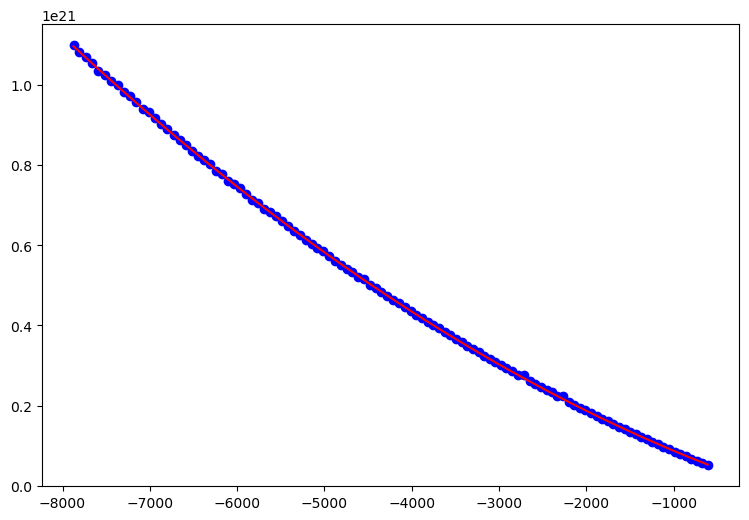

In [16]:
plt.plot(resultsArray[:,0],np.square((resultsArray[:,5])*1E9),'bo')
fitY = func(resultsArray[:,0],*popt)
plt.plot(resultsArray[:,0],fitY,'r-')

In [17]:
#Save Kittel fitted variables, g, Hk, MEff
[g, Hk, MEff] = popt

In [18]:
#Fit linewidth to damping
dampFunc = fmrAna.linewidthFunc
popt, pcov = fmrAna.dampingFit(resultsArray[:,0],(resultsArray[:,7]*1E9),dampFunc)

In [19]:
popt

array([ 3.57042183e-01,  1.73548086e-02,  3.84784530e+03, -5.04513770e+02])

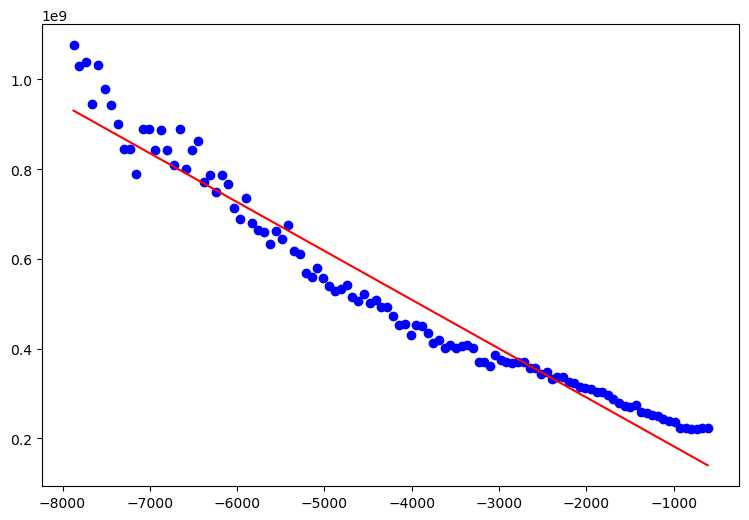

In [20]:
plt.plot(resultsArray[:,0],(resultsArray[:,7])*1E9,'bo')
fitDampY = dampFunc(resultsArray[:,0],*popt)
plt.plot(resultsArray[:,0],fitDampY,'r-')

In [21]:
#Try fitting with linregress
slope, intercept, r_value, p_value, std_err = fmrAna.linFit(resultsArray[:,0].astype(float),(resultsArray[:,7]*1E9).astype(float))

In [22]:
#Extract alpha damping parameter
slope/(g*2*8.781E5)

-0.030634328059280413